# PCA 주성분 분석 
주성분 분석은 하나의 관측 대상에 대해 많은 관측 값(다변량(多變量))이 있는 경우 하나 하나의 변수별 또는 2개 변수의 상관관계별로 검토해도 전체 상을 파악할 수 없는 경우가 있다. 주성분 분석은 많은 변수의 분산방식(분산ㆍ공분산)의 패턴을 간결하게 ‘표현’하는 주성분을 원래 변수의 선형결합(무게에 대한 평균점)으로서 추출하는 통계기법이다. 즉, p개의 변수가 있는 경우 거기에서 얻은 정보를 p보다 상당히 작은 k개의 변수로 요약하는 것이다. 다른 설명으로는 p차원 공간의 축을 회전시켜 많은 변수의 분산을 가장 잘 ‘반영’한 소수의 새로운 축을 찾아내는 기술이라고도 할 수 있다.(네이버 펌) <br>
결론적으로 활용관점에서 이야기하면 PCA 는 PCA 자체를 사용해서 Anomaly Detection 등을 수행하거나, 회귀분석등을 수행하기 전에 전처리 용도로 사용할 수 있다. <참조 : http://rfriend.tistory.com/61>

# 데이터 생성 
PCA 분석을 위한 가상의 데이터를 만들어 보자. 데이터의 형태는 아래와 같다 

In [25]:
x<-1:10
y<-x+runif(10,min=-.5,max=.5)
z<-x+y+runif(10,min=-10,max=.10)
r<-runif(1, -5.0, 17.5)/x
(data<-data.frame(x,y,z,r))

x,y,z,r
1,1.037207,-3.388737,2.3267907
2,2.036531,3.390203,1.1633954
3,3.238043,-1.306867,0.7755969
4,3.812732,1.346827,0.5816977
5,5.159830,2.564558,0.4653581
6,5.976359,9.474380,0.3877985
7,6.611648,7.098981,0.3323987
8,8.395447,7.687069,0.2908488
9,9.390938,13.205831,0.2585323
10,10.126063,18.925502,0.2326791


# Princomp 함수 
별도의 회전없이 한번 pca 분석을 생성한 데이터에 실행하여 보자. 실제로는 varimax 회전등을 사용하여 PCA 분석을 실행해야 한다. 

In [30]:
pr<-princomp(data)
summary(pr)
pr$scores[,1:2]

Importance of components:
                         Comp.1     Comp.2      Comp.3       Comp.4
Standard deviation     7.524792 1.47233245 0.355270937 0.1477322279
Proportion of Variance 0.960708 0.03678021 0.002141518 0.0003702993
Cumulative Proportion  0.960708 0.99748818 0.999629701 1.0000000000

Comp.1,Comp.2
11.337470,-0.7559784
4.757634,-2.9356396
7.925079,0.8880388
5.074977,0.4556479
3.165964,1.2342254
-3.392634,-1.2933249
-1.972852,0.9190895
-3.503169,2.2822800
-8.940516,0.5843858
-14.451952,-1.3787245


# 회전 후 PCA 분석 
회전후 PCA 분석을 하기 위해서 별도의 라이브러리를 사용한다. 아래의 내용은 설명력이 높은 변수부터 설명력이 어떻게 변하는지를 보여주는데, 몇개의 주성분을 사용하여 차원을 구성하는 것이 적합한지를 plot 을 사용해서 판단해보도록 한다. <br>
Summary 결과를 보면 첫번째 항목인 x 하나만 주성분으로 사용하여도 충분하다고 판단된다. 이 부분은 당연히 다른 모든 변수를 x 를 기준으로 만들었기 때문이라고 볼 수 있겠다. 

In [5]:
#install.packages(c("psych","GPArotation"))
library(psych)
library(GPArotation)

# 몇개의 주성분이 의미가 있는가?
급격하게 score 가 떨어지는 부분전까지의 주성분을 사용하면 되겠다... 아래의 예라고 하면 2개 쓰면 되겠다 싶다.. 

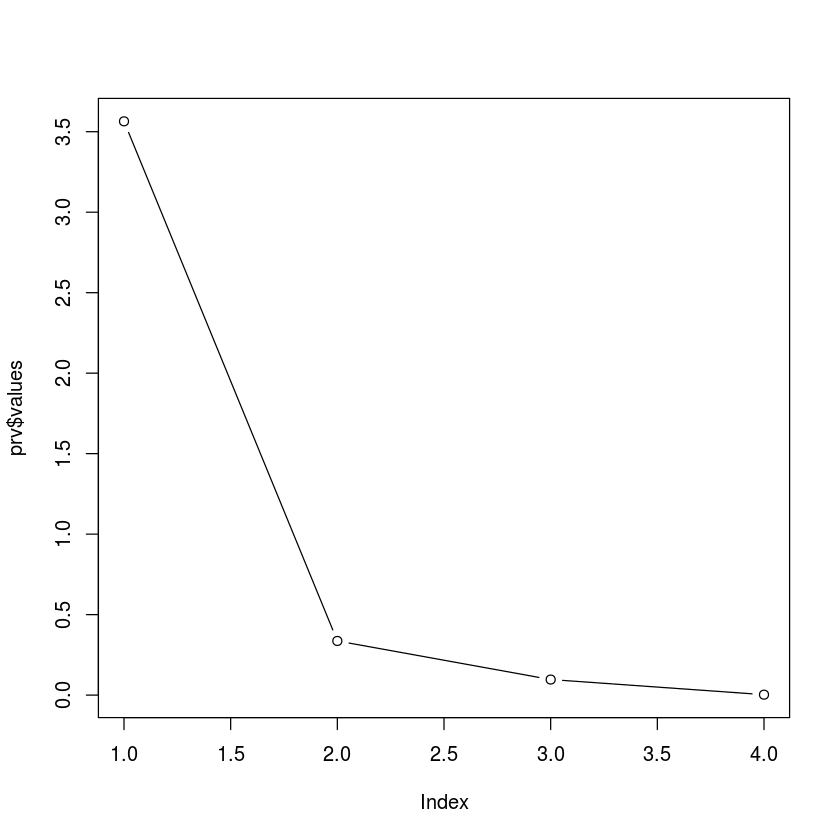

In [64]:
prv<-principal(data, nfactors=3, rotate="varimax")
# 주성분 2개만 사용하면 될 듯 
plot(prv$values, type='b')

# varimax Rotation PCA 분석
차원 3개로 PCA 분석 내용을 식으로 만들어보면 아래와 같이 될 것이다. 주성분 RC3 이라는 녀석은 x와는 0.57 정도의 상관관계 r 과는 -0.305의 상관 관계가 있다. 라고 해석하면 되겠다. <br>
그러니까 우리가 PCA 분석한 모델을 가지고 새로운 데이터에 대해서 차원의 score 를 구하고자 한다면 아래와 같은 식을 실행하면 되는 것인데, 실제로는 model.values 를 통해서 유의미한 주성분의 갯수를 구하고 해당 갯수만큼만 활용한 식으로 차원 score 를 구해주면 되겠다. <br>
(참고: RC3 = 0.570*x + 0.561*y + 0.853*z -0.305*r) <Br>

In [65]:
prv<-principal(data, nfactors=3, rotate="varimax")
# PCA 함수에서 사용가능한 변수 및 함수 
names(prv)
# 각차원의 주성분 영향도 확인 
prv$loadings
# 그럼 새로운 데이터에 대한 차원 score 를 구해보자 
test_x = 1
test_y = 2
test_z = 3
# RC3 차원 주성분 하나 사용
print(0.570 * test_x)
# RC3 차원 주성분 두개 사용 
print(0.570 * test_x + 0.561 * test_x)
#biplot(prv)
# 그냥 훈련 데이터 전체 Scores 
prv$scores

[1] "values"       "rotation"     "n.obs"        "communality"  "loadings"    
 [6] "fit"          "fit.off"      "fn"           "Call"         "uniquenesses"
[11] "complexity"   "chi"          "EPVAL"        "R2"           "objective"   
[16] "residual"     "rms"          "factors"      "dof"          "null.dof"    
[21] "null.model"   "criteria"     "STATISTIC"    "PVAL"         "weights"     
[26] "r.scores"     "rot.mat"      "Vaccounted"   "Structure"    "scores"


Loadings:
  RC3    RC2    RC1   
x  0.570  0.465  0.676
y  0.561  0.451  0.694
z  0.853  0.330  0.405
r -0.305 -0.896 -0.323

                 RC3   RC2   RC1
SS loadings    1.460 1.331 1.206
Proportion Var 0.365 0.333 0.302
Cumulative Var 0.365 0.698 0.999

[1] 0.57
[1] 1.131


RC3,RC2,RC1
-0.6424297,-2.68904962,0.17239034
0.6343329,-0.33903210,-1.97465570
-1.1897324,0.39758963,-0.43651149
-0.7514567,0.64099269,-0.58777416
-0.8482129,0.64312056,0.05161648
0.7861687,0.52358257,-0.78499105
-0.1820796,0.52454619,0.40078627
-0.5213260,0.31641025,1.48703555
0.6950234,0.09567771,1.10646882
2.0197123,-0.11383789,0.56563493
